In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

import random

In [3]:
np.random.seed(0)

In [4]:
( X_train, y_train ), ( X_test, y_test ) = mnist.load_data()

In [5]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
assert( X_train.shape[ 0 ] == y_train.shape[ 0 ]), "Training data: #images != #labels"
assert( X_test.shape[ 0 ] == y_test.shape[ 0 ]), "Testing data: #images != #labels"
assert( X_train.shape[ 1: ] == ( 28, 28 ) ), "The dimensions of the images have to be 28x28."
assert( X_test.shape[ 1: ] == ( 28, 28 ) ), "The dimensions of the images have to be 28x28."

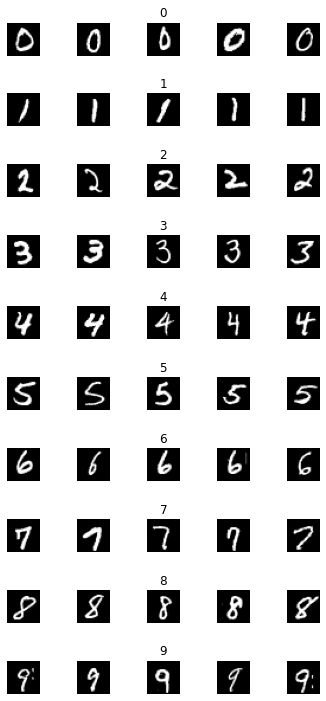

In [7]:
num_of_samples=[]

cols = 5
num_classes = 10

#fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig, axis = plt.subplots ( nrows = num_classes, ncols = cols, figsize = (5, 10) )
fig.tight_layout()
     
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[ y_train == j ]
        axis[j][i].imshow( x_selected[ random.randint( 0, len( x_selected ) - 1 ), :, : ], cmap = plt.get_cmap( "gray" ) )
        axis[j][i].axis( "off" )
        if i == 2:
            axis[j][i].set_title( str( j ) )
            num_of_samples.append( len ( x_selected ) )        

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of samples / images')

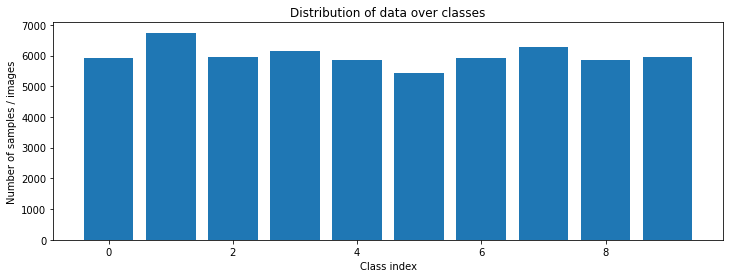

In [8]:
print( num_of_samples )
plt.figure( figsize = ( 12, 4 ) )
plt.bar( range( 0, num_classes), num_of_samples )
plt.title( "Distribution of data over classes" )
plt.xlabel( "Class index" )
plt.ylabel( "Number of samples / images" )

In [9]:
X_train_flat = X_train.reshape( ( X_train.shape[ 0 ], X_train.shape[ 1 ], X_train.shape[ 2 ], 1 ) )
X_test_flat = X_test.reshape( ( X_test.shape[ 0 ], X_test.shape[ 1 ], X_test.shape[ 2 ], 1 ) )
print( X_train_flat.shape )
print( X_test_flat.shape )

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
y_train_flat = to_categorical( y_train, num_classes )
y_test_flat = to_categorical( y_test, num_classes )

In [11]:
X_train_flat = X_train_flat / 255
X_test_flat = X_test_flat / 255

In [12]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D( 30, ( 5, 5 ), input_shape = (28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D( 15, ( 3, 3 ), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
leNet = leNet_model()
print ( leNet.summary() )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [1]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
validation_x = np.asarray(validation_x)
validation_y = np.asarray(validation_y)
h = leNet.fit(X_train_flat, y_train_flat, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

NameError: name 'leNet' is not defined

Text(0.5, 0, 'epoch')

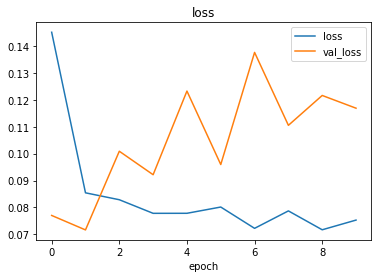

In [21]:
plt.plot( h.history[ 'loss' ] )
plt.plot( h.history[ 'val_loss' ])
plt.legend( [ 'loss', 'val_loss' ] )
plt.title( 'loss' )
plt.xlabel( 'epoch' )

Text(0.5, 0, 'epoch')

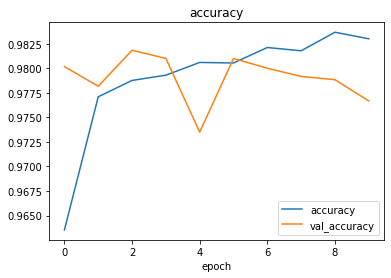

In [22]:
plt.plot( h.history[ 'accuracy' ] )
plt.plot( h.history[ 'val_accuracy' ])
plt.legend( [ 'accuracy', 'val_accuracy' ] )
plt.title( 'accuracy' )
plt.xlabel( 'epoch' )

In [23]:
score = leNet.evaluate( X_test_flat, y_test_flat, verbose=0 )
print( type( score ) )
print( "Test score:", score[ 0 ] )
print( "Test accuracy:", score[ 1 ] )

<class 'list'>
Test score: 0.15319977700710297
Test accuracy: 0.9702000021934509


predicted digit: [0]
predicted digit: [1]
predicted digit: [2]
predicted digit: [3]
predicted digit: [8]
WRONG PREDICTION!
predicted digit: [5]
predicted digit: [8]
WRONG PREDICTION!
predicted digit: [1]
WRONG PREDICTION!
predicted digit: [8]
predicted digit: [8]
WRONG PREDICTION!


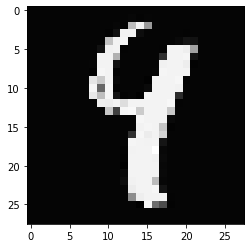

In [24]:
import cv2
from PIL import Image

#import requests
#from PIL import Image
#url = "https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png"
#response = requests.get( url, stream=True )
#print( response )
#img = Image.open( response.raw )

for x in range(0,10):
    filename = "Image/" + str(x) + ".png"
    img = Image.open( filename )
    #-----------------------------------------------
    img_array = np.asarray( img )
    img_resized = cv2.resize( img_array, ( 28, 28 ) )
    gray_scale = cv2.cvtColor( img_resized, cv2.COLOR_BGR2GRAY)
    img_inv = cv2.bitwise_not( gray_scale )
    #-----------------------------------------------
    image = img_inv / 255
    image = image.reshape( 1, 28, 28, 1 )
    #-----------------------------------------------
    prediction = np.argmax( leNet.predict( image ), axis=-1)
    print( "predicted digit:", str( prediction ) )
    if( prediction != x ):
        plt.imshow( img_inv, cmap = plt.get_cmap( "gray" ) )
        print("WRONG PREDICTION!")
